<a href="https://colab.research.google.com/github/marastika/GAN_BUKALAPAK/blob/main/METHOD_GAN%20DAN%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the CSV file
file_path = '/content/Data-scrapping-komentar-e-commerce-BUKALAPAK.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data_head = data.head()
data_info = data.info()

data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  133 non-null    float64
 1   Nama pemilik        133 non-null    object 
 2   Nama Toko           133 non-null    object 
 3   Produk              133 non-null    object 
 4   Nama akun pembeli   133 non-null    object 
 5   Profil gambar akun  133 non-null    object 
 6   Deteksi Akun        133 non-null    object 
 7   Review /Komentar    133 non-null    object 
 8   Rating bintang      133 non-null    float64
 9   Sentimen            133 non-null    object 
 10  Source              133 non-null    object 
 11  Data_Review         133 non-null    object 
 12  Month               133 non-null    object 
 13  YEAR                133 non-null    float64
 14  LINK                133 non-null    object 
 15  Unnamed: 15         0 non-null      float64
 16  Unname

(    No            Nama pemilik  \
 0  1.0  Imam Nashokha, S.Pd.\n   
 1  2.0  Imam Nashokha, S.Pd.\n   
 2  3.0  Imam Nashokha, S.Pd.\n   
 3  4.0  Imam Nashokha, S.Pd.\n   
 4  5.0  Imam Nashokha, S.Pd.\n   
 
                                            Nama Toko  \
 0  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 1  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 2  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 3  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 4  MULTISHOPBKS (https://www.bukalapak.com/u/ziia...   
 
                                               Produk  \
 0  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 1  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 2  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 3  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 4  Handphone Hp Xiaomi Redmi Note 8 Ram 4gb Inter...   
 
           Nama akun pembeli  \
 0           Fakih Zuhrianto   
 1          Ceppy Priagung\n   
 2  

In [2]:
# Drop rows with missing values in relevant columns
cleaned_data = data[['Review /Komentar', 'Rating bintang', 'Sentimen']].dropna()

# Convert the sentiment labels to binary (1 for POSITIVE, 0 for NEGATIVE)
cleaned_data['Sentimen'] = cleaned_data['Sentimen'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

# Check the cleaned data
cleaned_data.head(), cleaned_data['Sentimen'].value_counts()


(                                    Review /Komentar  Rating bintang  Sentimen
 0                      Jelek hp nyah bekass lem nyah             3.0         0
 1   barang bagus, pengemasan cepat, semua fungsi ...             4.0         0
 2  Recomended seller, terimakasih atas kejujurann...             5.0         0
 3                             Barang bagus banget!\n             5.0         0
 4                           Barang bagus banget!\n\n             5.0         0,
 Sentimen
 0    133
 Name: count, dtype: int64)

In [3]:
# Focus on the relevant columns: review text and account detection status
# Drop rows with missing values in these columns
fake_review_data = data[['Review /Komentar', 'Deteksi Akun']].dropna()

# Encode the target variable (1 for fake, 0 for real)
fake_review_data['Deteksi Akun'] = fake_review_data['Deteksi Akun'].apply(lambda x: 1 if x == 'Buatan' else 0)

# Check the distribution of the target variable
target_distribution = fake_review_data['Deteksi Akun'].value_counts()

# Display the first few rows and the distribution
fake_review_data.head(), target_distribution


(                                    Review /Komentar  Deteksi Akun
 0                      Jelek hp nyah bekass lem nyah             1
 1   barang bagus, pengemasan cepat, semua fungsi ...             1
 2  Recomended seller, terimakasih atas kejujurann...             0
 3                             Barang bagus banget!\n             0
 4                           Barang bagus banget!\n\n             1,
 Deteksi Akun
 0    105
 1     28
 Name: count, dtype: int64)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into features (X) and target (y)
X = fake_review_data['Review /Komentar']
y = fake_review_data['Deteksi Akun']

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'])

accuracy, conf_matrix, report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7037037037037037,
 array([[19,  0],
        [ 8,  0]]),
 '              precision    recall  f1-score   support\n\n        Real       0.70      1.00      0.83        19\n        Fake       0.00      0.00      0.00         8\n\n    accuracy                           0.70        27\n   macro avg       0.35      0.50      0.41        27\nweighted avg       0.50      0.70      0.58        27\n')

In [5]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_vect, y)

# Split the SMOTE data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train a Logistic Regression model on the balanced data
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test_smote)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test_smote, y_pred_smote)
report_smote = classification_report(y_test_smote, y_pred_smote, target_names=['Real', 'Fake'])

accuracy_smote, conf_matrix_smote, report_smote


(0.6428571428571429,
 array([[ 6, 14],
        [ 1, 21]]),
 '              precision    recall  f1-score   support\n\n        Real       0.86      0.30      0.44        20\n        Fake       0.60      0.95      0.74        22\n\n    accuracy                           0.64        42\n   macro avg       0.73      0.63      0.59        42\nweighted avg       0.72      0.64      0.60        42\n')

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load your dataset (assuming data is already loaded)
# data = pd.read_csv('your_data.csv')  # Example if you need to load the data

# Select relevant columns and drop missing values
cleaned_data = data[['Review /Komentar', 'Deteksi Akun']].dropna() # Include 'Deteksi Akun' in the column selection

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_data['Review /Komentar'])
y = cleaned_data['Deteksi Akun'].apply(lambda x: 1 if x == 'Buatan' else 0)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the SMOTE data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train a Logistic Regression model on the balanced data
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test_smote)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test_smote, y_pred_smote)
report_smote = classification_report(y_test_smote, y_pred_smote, target_names=['Real', 'Fake'])

print(f"Accuracy after SMOTE: {accuracy_smote * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_smote)
print("Classification Report:")
print(report_smote)

Accuracy after SMOTE: 64.29%
Confusion Matrix:
[[ 6 14]
 [ 1 21]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.86      0.30      0.44        20
        Fake       0.60      0.95      0.74        22

    accuracy                           0.64        42
   macro avg       0.73      0.63      0.59        42
weighted avg       0.72      0.64      0.60        42



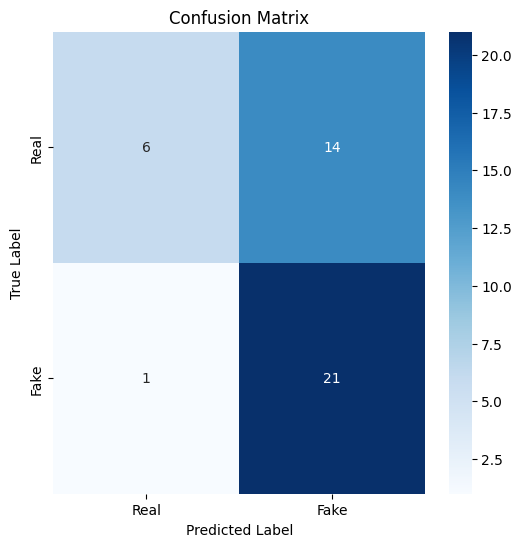

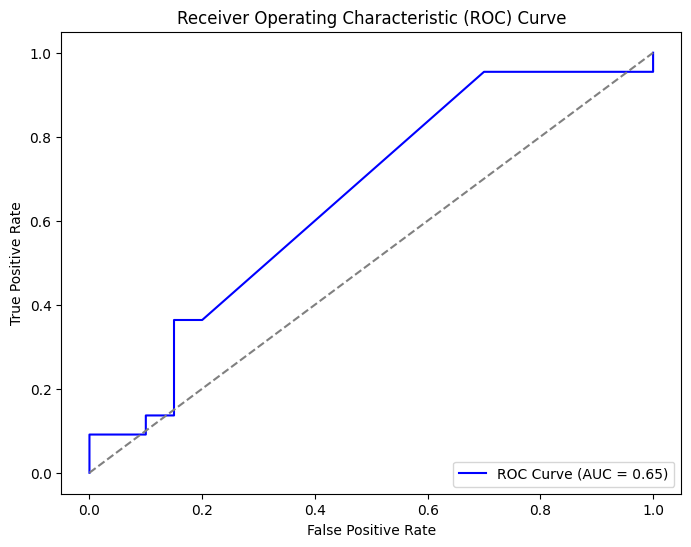

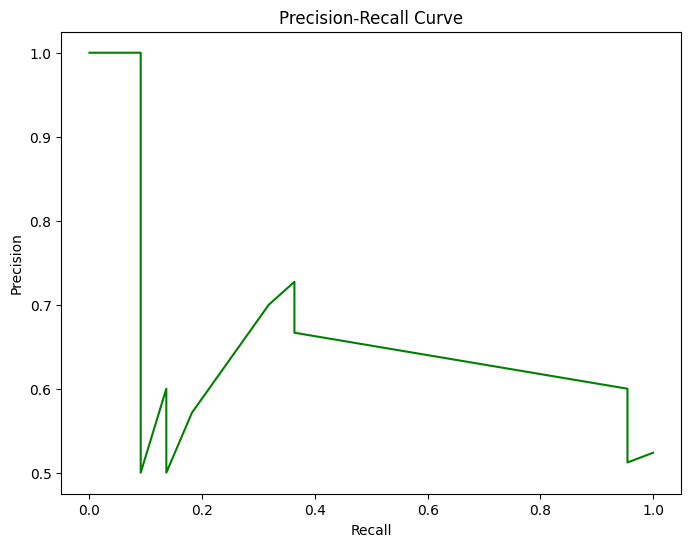

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_test, y_pred_prob):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix_smote, classes=['Real', 'Fake'])

# Plot the ROC curve
y_pred_prob_smote = model_smote.predict_proba(X_test_smote)[:, 1]
plot_roc_curve(y_test_smote, y_pred_prob_smote)

# Plot the Precision-Recall curve
plot_precision_recall_curve(y_test_smote, y_pred_prob_smote)


In [11]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train_smote, y_train_smote)
y_pred_svm = model_svm.predict(X_test_smote)


In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_smote, y_train_smote)
y_pred_rf = model_rf.predict(X_test_smote)


In [13]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = model_xgb.predict(X_test_smote)


In [14]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = model_xgb.predict(X_test_smote)


In [15]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)
model_lr.fit(X_train_smote, y_train_smote)
y_pred_lr = model_lr.predict(X_test_smote)


In [16]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(
    estimators=[
        ('lr', model_lr),
        ('rf', model_rf),
        ('xgb', model_xgb)
    ], voting='soft')
model_voting.fit(X_train_smote, y_train_smote)
y_pred_voting = model_voting.predict(X_test_smote)


In [18]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(
    estimators=[
        ('lr', model_lr),
        ('rf', model_rf),
        ('xgb', model_xgb)
    ], voting='soft')
model_voting.fit(X_train_smote, y_train_smote)
y_pred_voting = model_voting.predict(X_test_smote)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train_smote.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test_smote, y_test_smote))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5749 - loss: 0.6911 - val_accuracy: 0.6190 - val_loss: 0.6696
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6820 - loss: 0.6450 - val_accuracy: 0.6429 - val_loss: 0.6544
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7111 - loss: 0.6144 - val_accuracy: 0.6429 - val_loss: 0.6392
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7197 - loss: 0.5861 - val_accuracy: 0.6429 - val_loss: 0.6282
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7150 - loss: 0.5621 - val_accuracy: 0.6429 - val_loss: 0.6169
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7380 - loss: 0.5283 - val_accuracy: 0.6429 - val_loss: 0.6116
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7151 - loss: 0.5203 - val_accuracy: 0.6429 - val_loss: 0.6086
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6927 - loss: 0.5019 - val_accuracy: 0.6429 - val_loss: 0.6023
Epoch 9/10


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train_smote.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_data=(X_test_smote, y_test_smote))


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - accuracy: 0.4992 - loss: 0.6859 - val_accuracy: 0.6667 - val_loss: 0.6828
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7569 - loss: 0.6453 - val_accuracy: 0.6905 - val_loss: 0.6675
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7122 - loss: 0.6188 - val_accuracy: 0.6905 - val_loss: 0.6582
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7555 - loss: 0.5819 - val_accuracy: 0.6429 - val_loss: 0.6467
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7294 - loss: 0.5657 - val_accuracy: 0.6429 - val_loss: 0.6361
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7324 - loss: 0.5305 - val_accuracy: 0.6429 - val_loss: 0.6271
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7499 - loss: 0.4998 - val_accuracy: 0.6429 - val_loss: 0.6206
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7287 - loss: 0.4922 - val_accuracy: 0.6429 - val_loss: 0.6188

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)
best_params = grid_search.best_params_


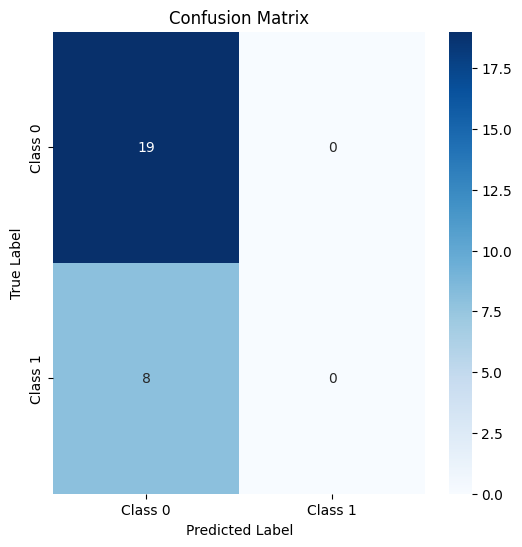

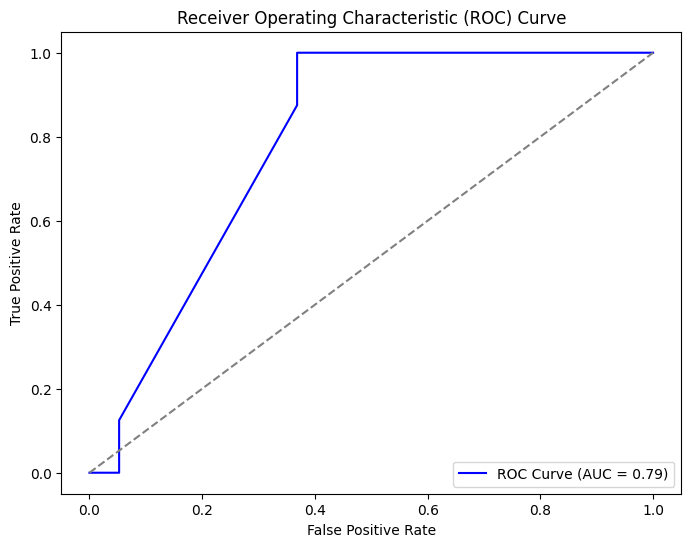

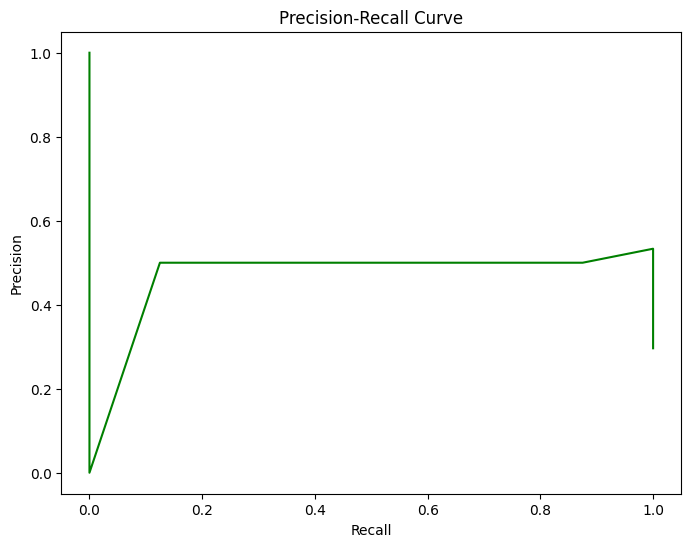

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np

# ... (Rest of your functions remain the same)

# Assuming you have trained a model and have y_true, y_pred,
# and the model object ready

# Calculate predicted probabilities (example using logistic regression)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Confusion Matrix
plot_confusion_matrix(y_test, y_pred, classes=['Class 0', 'Class 1'])

# ROC Curve
plot_roc_curve(y_test, y_pred_prob)

# Precision-Recall Curve
plot_precision_recall_curve(y_test, y_pred_prob)

# ... (Rest of your code)

In [26]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [27]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
}

model = XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)


Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 1.0}


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Mean accuracy: {scores.mean():.2f}")


Mean accuracy: 0.80


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Fit the model to your training data
# (Assuming 'X_train' and 'y_train' are defined from your train-test split)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       1.00      0.12      0.22         8

    accuracy                           0.74        27
   macro avg       0.87      0.56      0.53        27
weighted avg       0.81      0.74      0.66        27

[[19  0]
 [ 7  1]]


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


RMSE: 0.51
R² Score: -0.24


In [34]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)


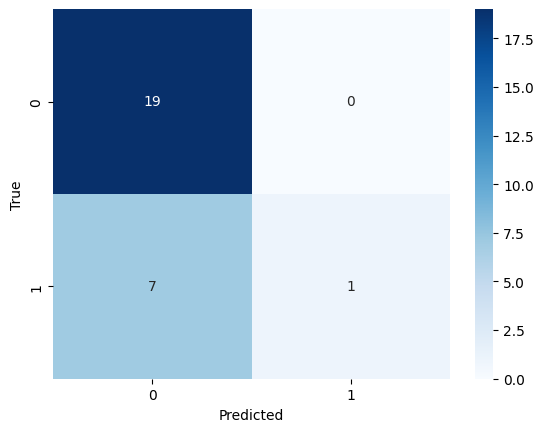

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


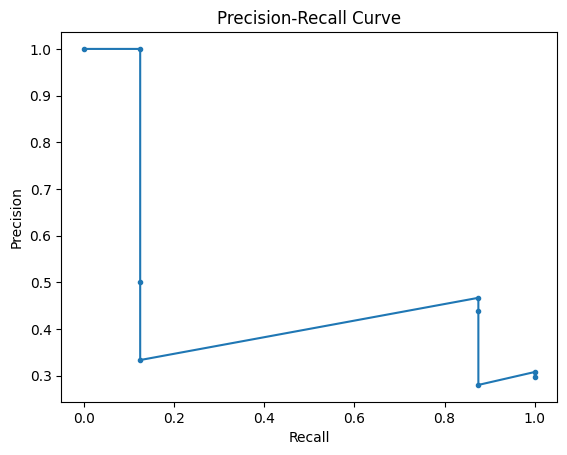

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


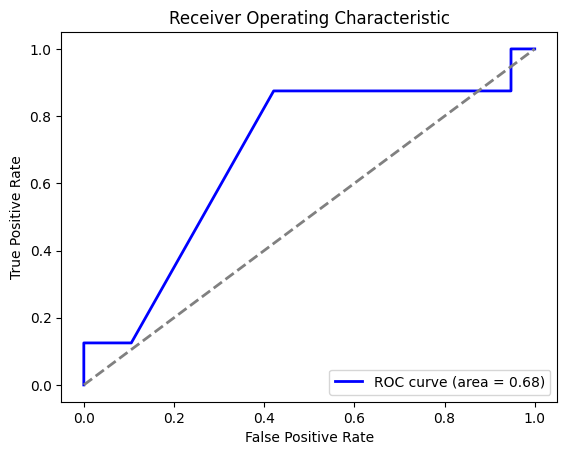

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


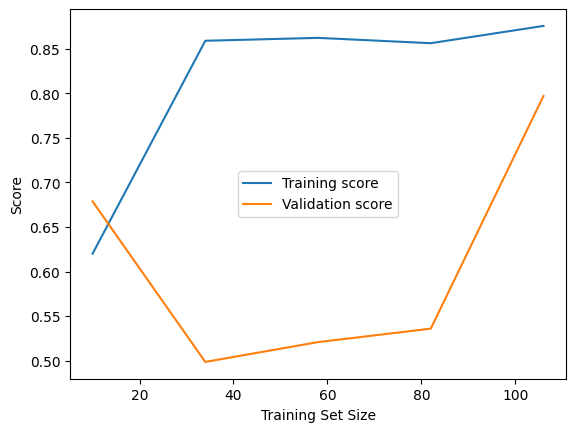

In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy'
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, valid_scores.mean(axis=1), label="Validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.show()


In [41]:
from sklearn.ensemble import VotingClassifier
# Assuming you have defined and trained model1, model2, and model3 previously
# For example:
# model1 = LogisticRegression()
# model1.fit(X_train, y_train)
# ... similarly for model2 and model3

ensemble_model = VotingClassifier(estimators=[
    ('model1', model1), ('model2', model2), ('model3', model3)],
    voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

NameError: name 'model1' is not defined

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression # Example model

# Define and train your models
model1 = LogisticRegression()
model1.fit(X_train, y_train)

model2 = LogisticRegression() # Replace with your desired model
model2.fit(X_train, y_train)

model3 = LogisticRegression() # Replace with your desired model
model3.fit(X_train, y_train)

# Now create your VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('model1', model1), ('model2', model2), ('model3', model3)],
    voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

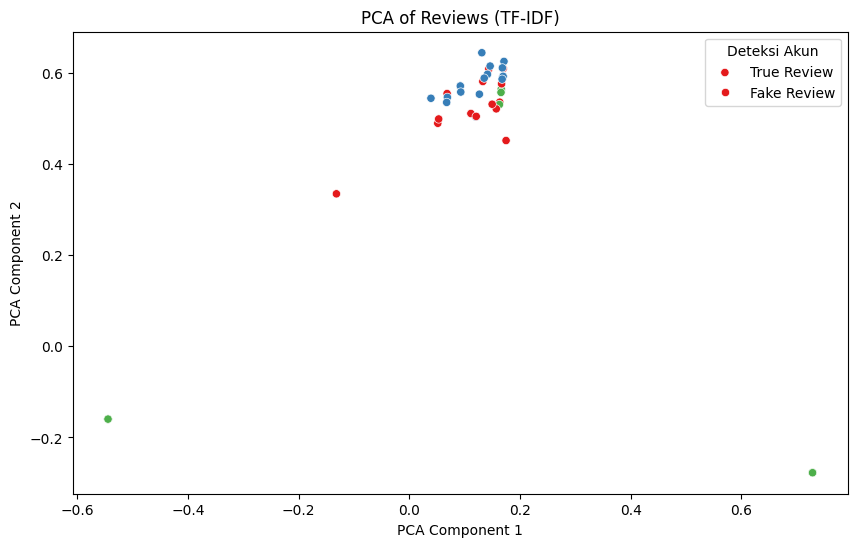

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Assume cleaned_data is already loaded and preprocessed
# If not, you would load your data here:
# cleaned_data = pd.read_csv('your_data.csv')

# Example cleaned_data structure:
# cleaned_data = pd.DataFrame({
#     'Review /Komentar': ['Review text 1', 'Review text 2', ...],
#     'Deteksi Akun': [0, 1, ...]  # 0 for True, 1 for Fake
# })

# Vectorize the text with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = vectorizer.fit_transform(cleaned_data['Review /Komentar']).toarray()

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)

# Add PCA results to the dataframe
pca_df = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Deteksi Akun'] = cleaned_data['Deteksi Akun'].values

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Deteksi Akun', data=pca_df, palette='Set1')
plt.title('PCA of Reviews (TF-IDF)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Deteksi Akun', labels=['True Review', 'Fake Review'])
plt.show()


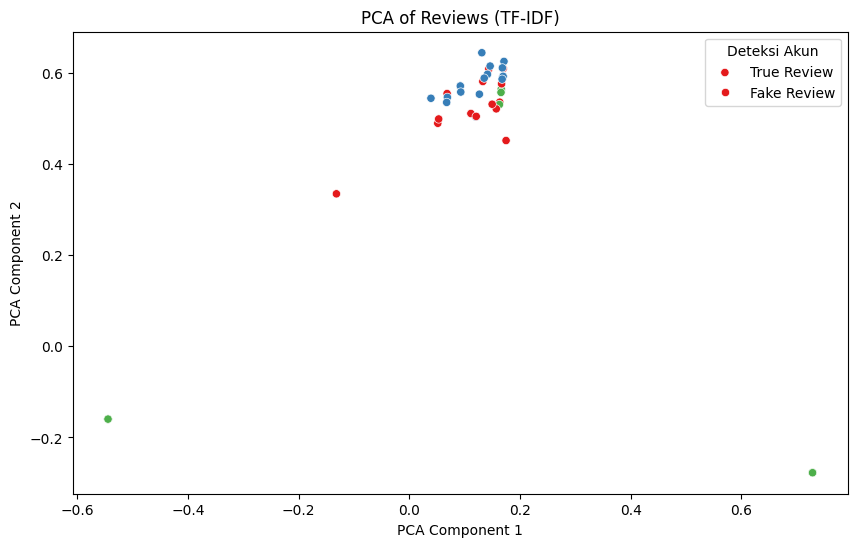

In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# Adjust the file path to where your CSV is stored
# cleaned_data = pd.read_csv('path_to_your_file.csv')

# For this example, let's assume cleaned_data is already defined
# Example cleaned_data structure:
# cleaned_data = pd.DataFrame({
#     'Review /Komentar': ['Review text 1', 'Review text 2', ...],
#     'Deteksi Akun': [0, 1, ...]  # 0 for True, 1 for Fake
# })

# Vectorize the text with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = vectorizer.fit_transform(cleaned_data['Review /Komentar']).toarray()

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)

# Add PCA results to the dataframe
pca_df = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Deteksi Akun'] = cleaned_data['Deteksi Akun'].values

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Deteksi Akun', data=pca_df, palette='Set1')
plt.title('PCA of Reviews (TF-IDF)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Deteksi Akun', labels=['True Review', 'Fake Review'])
plt.show()


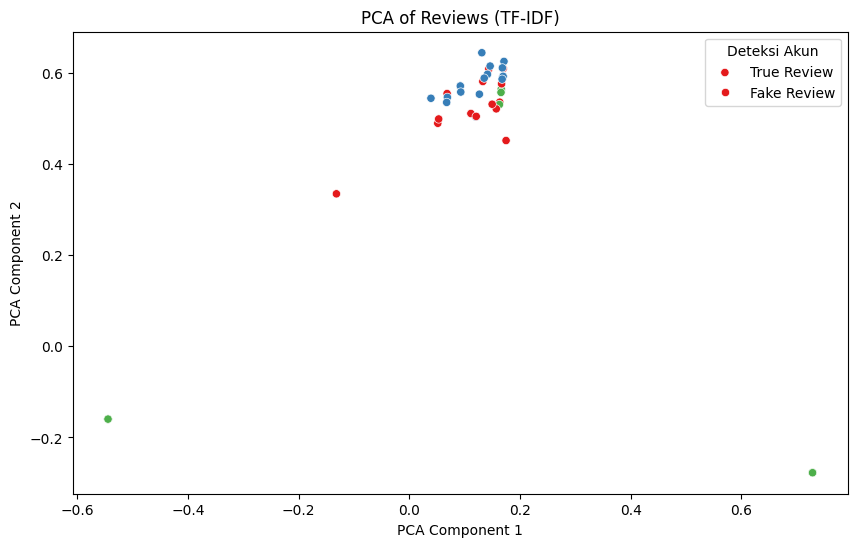

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# Adjust the file path to where your CSV is stored
# cleaned_data = pd.read_csv('path_to_your_file.csv')

# For this example, let's assume cleaned_data is already defined
# Example cleaned_data structure:
# cleaned_data = pd.DataFrame({
#     'Review /Komentar': ['Review text 1', 'Review text 2', ...],
#     'Deteksi Akun': [0, 1, ...]  # 0 for True, 1 for Fake
# })

# Vectorize the text with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = vectorizer.fit_transform(cleaned_data['Review /Komentar']).toarray()

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)

# Add PCA results to the dataframe
pca_df = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Deteksi Akun'] = cleaned_data['Deteksi Akun'].values

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='Deteksi Akun', data=pca_df, palette='Set1')
plt.title('PCA of Reviews (TF-IDF)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Deteksi Akun', labels=['True Review', 'Fake Review'])
plt.show()
